In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.dtype
X_train.shape
X_train[0, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train.dtype
y_train.shape
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# Checking the counts of each label in y_train

values, counts = np.unique(y_train, return_counts=True)
print(np.asarray((values, counts)).T)

[[   0 6000]
 [   1 6000]
 [   2 6000]
 [   3 6000]
 [   4 6000]
 [   5 6000]
 [   6 6000]
 [   7 6000]
 [   8 6000]
 [   9 6000]]


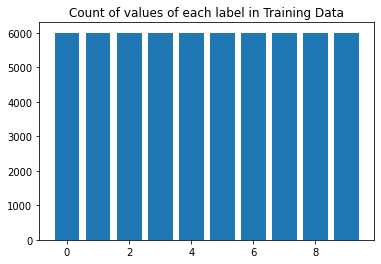

In [ ]:
plt.bar(values, counts)
plt.title("Count of values of each label in Training Data")
plt.show()

[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


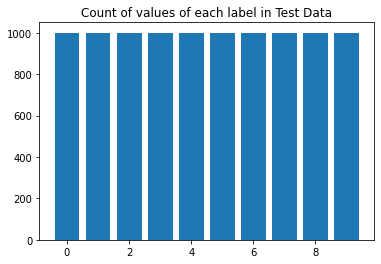

In [ ]:
# Checking the counts of each label in y_test

values, counts = np.unique(y_test, return_counts=True)
print(np.asarray((values, counts)).T)

plt.bar(values, counts)
plt.title("Count of values of each label in Test Data")
plt.show()

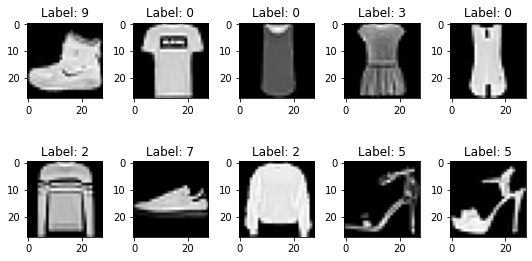

In [ ]:
# visualise the top few rows of X_train

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))
for i in range(2):
  for j in range(5):
    ax = axes[i, j]
    ax.imshow(X_train[i*5+j], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i*5+j]))
plt.tight_layout()
plt.show()

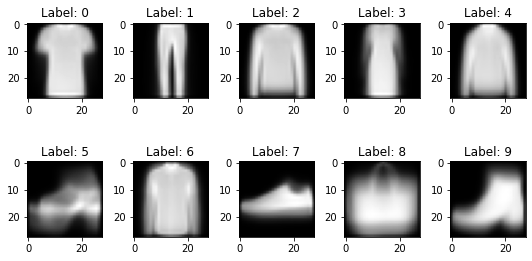

In [ ]:
# Plotting the mean of all images for each label

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))

X_train_mean = np.zeros((10, 28, 28))

for i in range(2):
  for j in range(5):
    X_train_mean[i*5+j, :, :] = np.mean(X_train[np.where(y_train == i*5+j)[0], :, :], axis=0)
    ax = axes[i, j]
    ax.imshow(X_train_mean[i*5+j, :, :], cmap='gray')
    ax.set_title('Label: {}'.format(i*5+j))

plt.tight_layout()   
plt.show()

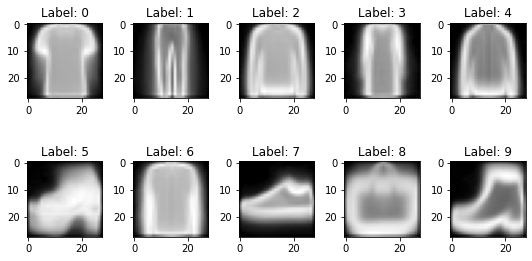

In [ ]:
# Plotting the mean of all images for each label

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))

X_train_mean = np.zeros((10, 28, 28))

for i in range(2):
  for j in range(5):
    X_train_mean[i*5+j, :, :] = np.std(X_train[np.where(y_train == i*5+j)[0], :, :], axis=0)
    ax = axes[i, j]
    ax.imshow(X_train_mean[i*5+j, :, :], cmap='gray')
    ax.set_title('Label: {}'.format(i*5+j))

plt.tight_layout()   
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import regularizers, optimizers


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000] 

print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("x_valid shape: ", X_valid.shape)

x_train shape:  (55000, 28, 28)
x_test shape:  (10000, 28, 28)
x_valid shape:  (5000, 28, 28)


In [ ]:
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [ ]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (55000, 28, 28, 1)


In [ ]:
model = keras.models.Sequential([
          keras.layers.Conv2D(filters=6, kernel_size=5, 
                              strides=1, activation='relu', 
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),

          keras.layers.Conv2D(filters=16, kernel_size=5, 
                              strides=1, activation='relu',padding='valid'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='valid'),

          keras.layers.Conv2D(filters=120, kernel_size=5, 
                              strides=1, activation='relu',padding='valid'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [ ]:
def lr_schedule(epochs):
    if epochs < 2:
        lr = 5e-4
    elif epochs > 2 and epochs <= 5:
        lr = 2e-4
    elif epochs > 5 and epochs <= 9:
        lr = 5e-5
    else:
        lr = 1e-5
    return lr

In [ ]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [ ]:
#from tensorflow.keras.optimizers import Adam

#adam = Adam(lr = 0.001, decay = 1e-3)
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5771 - accuracy: 0.7854 - val_loss: 0.4318 - val_accuracy: 0.8512
Epoch 2/20
1719/1719 [==============================] - 42s 24ms/step - loss: 0.3817 - accuracy: 0.8613 - val_loss: 0.3295 - val_accuracy: 0.8798
Epoch 3/20
1719/1719 [==============================] - 44s 26ms/step - loss: 0.3174 - accuracy: 0.8852 - val_loss: 0.3157 - val_accuracy: 0.8870
Epoch 4/20
1719/1719 [==============================] - 39s 23ms/step - loss: 0.3160 - accuracy: 0.8845 - val_loss: 0.3049 - val_accuracy: 0.8914
Epoch 5/20
1719/1719 [==============================] - 40s 23ms/step - loss: 0.2976 - accuracy: 0.8915 - val_loss: 0.2980 - val_accuracy: 0.8948
Epoch 6/20
1719/1719 [==============================] - 41s 24ms/step - loss: 0.2836 - accuracy: 0.8970 - val_loss: 0.2951 - val_accuracy: 0.8972
Epoch 7/20
1719/1719 [==============================] - 42s 24ms/step - loss: 0.2619 - accuracy: 0.9043 - val_loss: 0.2808 -

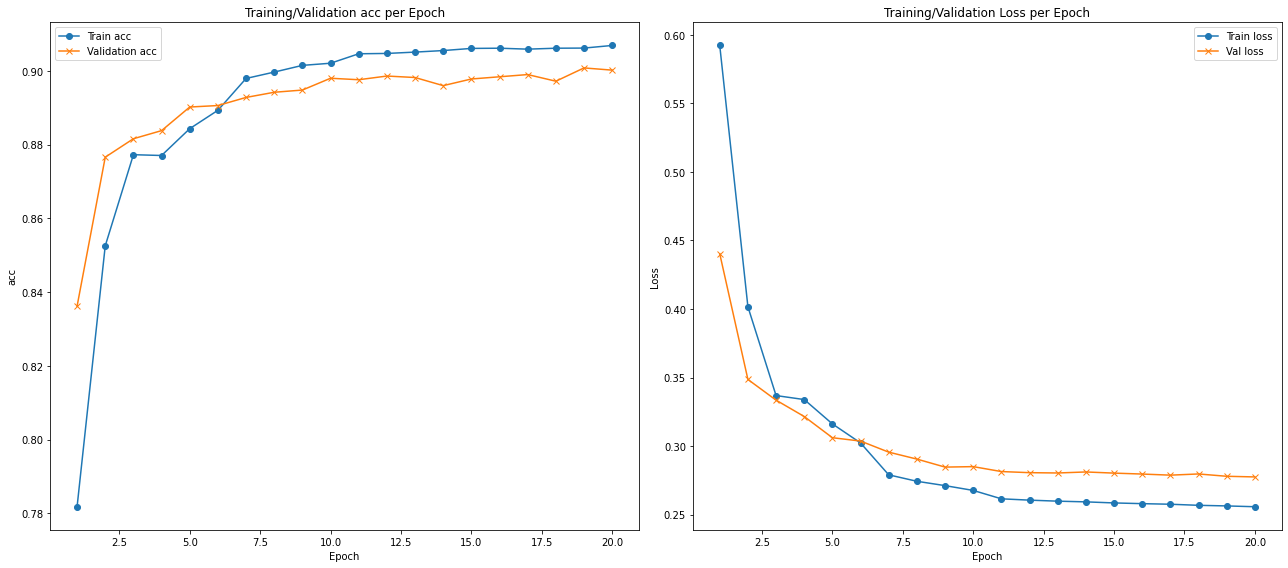

In [ ]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.8916
Test loss: 0.3043074607849121
Test accuracy: 0.8916000127792358
